<a href="https://colab.research.google.com/github/Ismail-therap/NLP-Project-Predicting-review-in-1-to-5-star-/blob/main/Fasttext_three_and_two_category_Spring_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url='https://drive.google.com/file/d/1-vBpWV0H0cxX5jSeHlQIKXIiosMKwq2t/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,review_stars,text,date
0,0tGuFBrhM03I6TCLxDQhyg,Dancing Goats Coffee Bar,419 W Ponce De Leon Ave,Decatur,GA,30030,33.775805,-84.303269,4.0,358,1,"{'RestaurantsPriceRange2': '1', 'WiFi': ""'free...","Food, Coffee & Tea, Restaurants, Donuts, Cafes","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",IqUD0yoRq66PqnbSvRb5JA,1,OMG!! Hate! This place. Rude to me. On so many...,2018-10-06 14:34:51
1,498F3rnpng6qv53S9diTSw,Boston Market,"4607 Braker Ln, Ste 100",Austin,TX,78759,30.399832,-97.744997,3.0,102,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","American (Traditional), Caterers, Chicken Shop...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",n2eAlOnBo1St1p7MWqBFmg,1,Why bother being open on Thanksgiving if you c...,2019-11-28 20:02:11
2,7qBi3FMT2Oz4Jj1hCWwawA,Bea's Nail Salon,75 Blossom Ct,Boston,MA,02114,42.364891,-71.066818,3.0,23,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Nail Salons, Beauty & Spas","{'Monday': '9:30-19:0', 'Tuesday': '9:30-19:0'...",pHTrbVN4lzTlzqqnWEJYGw,1,"The fact that on a Saturday afternoon this ""sa...",2009-07-11 19:59:46
3,K4X4nJVp0BcSn9Cvoavk8A,T'Kilas Tacos & More,1248 Clairmont Rd,Decatur,GA,30030,33.789815,-84.307511,3.0,115,0,"{'GoodForKids': 'True', 'BikeParking': 'False'...","Mexican, Restaurants","{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3...",Jfc8qYR3uEHIpU0nKzpObg,1,"I came to Los Loros in search of the ""strong, ...",2008-09-08 21:34:50
4,D6U1_06gxciRs1NoYjwhKQ,ESPN Club - Temporarily Unavailable,2101 N Epcot Resorts Blvd,Orlando,FL,32836,28.368008,-81.555289,2.5,303,1,"{'GoodForKids': 'True', 'Caters': 'False', 'Re...","Hotels, American (New), Event Planning & Servi...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-23:0', ...",Dw_oka5MVWOsaJCncfIXZQ,1,My fries were stale and my cheesesteak was mos...,2018-01-14 01:41:50


In [ ]:
reviews = df

In [ ]:
reviews.shape

(50000, 18)

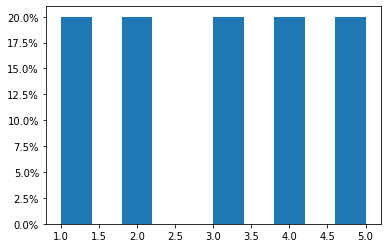

In [ ]:
uniformed_review = reviews
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.hist(uniformed_review["review_stars"],weights=np.ones(len(uniformed_review["review_stars"])) / len(uniformed_review["review_stars"]))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [ ]:
uniformed_review.review_stars.dtypes

dtype('int64')

# Creating 3 categories for the ratings

In [ ]:
# create a list of our conditions
conditions = [
    (uniformed_review['review_stars'] <= 2),
    (uniformed_review['review_stars'] == 3),
    (uniformed_review['review_stars'] > 3)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
uniformed_review['three_star'] = np.select(conditions, values)

# display updated DataFrame
uniformed_review.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,review_stars,text,date,three_star
0,0tGuFBrhM03I6TCLxDQhyg,Dancing Goats Coffee Bar,419 W Ponce De Leon Ave,Decatur,GA,30030,33.775805,-84.303269,4.0,358,1,"{'RestaurantsPriceRange2': '1', 'WiFi': ""'free...","Food, Coffee & Tea, Restaurants, Donuts, Cafes","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",IqUD0yoRq66PqnbSvRb5JA,1,OMG!! Hate! This place. Rude to me. On so many...,2018-10-06 14:34:51,Negative
1,498F3rnpng6qv53S9diTSw,Boston Market,"4607 Braker Ln, Ste 100",Austin,TX,78759,30.399832,-97.744997,3.0,102,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","American (Traditional), Caterers, Chicken Shop...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",n2eAlOnBo1St1p7MWqBFmg,1,Why bother being open on Thanksgiving if you c...,2019-11-28 20:02:11,Negative
2,7qBi3FMT2Oz4Jj1hCWwawA,Bea's Nail Salon,75 Blossom Ct,Boston,MA,02114,42.364891,-71.066818,3.0,23,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Nail Salons, Beauty & Spas","{'Monday': '9:30-19:0', 'Tuesday': '9:30-19:0'...",pHTrbVN4lzTlzqqnWEJYGw,1,"The fact that on a Saturday afternoon this ""sa...",2009-07-11 19:59:46,Negative
3,K4X4nJVp0BcSn9Cvoavk8A,T'Kilas Tacos & More,1248 Clairmont Rd,Decatur,GA,30030,33.789815,-84.307511,3.0,115,0,"{'GoodForKids': 'True', 'BikeParking': 'False'...","Mexican, Restaurants","{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3...",Jfc8qYR3uEHIpU0nKzpObg,1,"I came to Los Loros in search of the ""strong, ...",2008-09-08 21:34:50,Negative
4,D6U1_06gxciRs1NoYjwhKQ,ESPN Club - Temporarily Unavailable,2101 N Epcot Resorts Blvd,Orlando,FL,32836,28.368008,-81.555289,2.5,303,1,"{'GoodForKids': 'True', 'Caters': 'False', 'Re...","Hotels, American (New), Event Planning & Servi...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-23:0', ...",Dw_oka5MVWOsaJCncfIXZQ,1,My fries were stale and my cheesesteak was mos...,2018-01-14 01:41:50,Negative


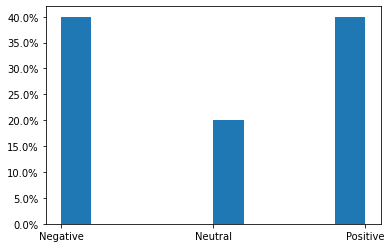

In [ ]:
plt.hist(uniformed_review["three_star"],weights=np.ones(len(uniformed_review["three_star"])) / len(uniformed_review["three_star"]))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [ ]:
reviews_smallest = uniformed_review[uniformed_review["three_star"] == 'Neutral']

## sampling negative review:
reviews_neg = uniformed_review[uniformed_review["three_star"] == 'Negative']
reviews_neg = reviews_neg.sample(n=reviews_smallest.shape[0])


## sampling positive review:
reviews_pos = uniformed_review[uniformed_review["three_star"] == 'Positive']
reviews_pos = reviews_pos.sample(n=reviews_smallest.shape[0])

uniformed_review = reviews_smallest.append([reviews_neg, reviews_pos])
uniformed_review.shape

(30000, 19)

# Fasttext

In [ ]:
!pip install fasttext
import fasttext as ft
import random
import csv

     |████████████████████████████████| 68 kB 2.8 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3139623 sha256=52674e89ef503dc2ab6a0de5398ae4bef2bf5b58a98a65ac03c3cbf514a50c08
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
uniformed_review['ratings'] = '__label__' + uniformed_review['three_star'].astype(str)
uniformed_review['text_with_rating'] = uniformed_review['ratings']+" " + uniformed_review['text'].astype(str)
review = uniformed_review['text_with_rating']
review.head()

20000    __label__Neutral Wait in line for an hour befo...
20001    __label__Neutral Bell in Hand's a fun bar for ...
20002    __label__Neutral Easy process. Not much to it,...
20003    __label__Neutral Fast food style of pho. Not a...
20004    __label__Neutral This is your standard Chinese...
Name: text_with_rating, dtype: object

In [ ]:
############################################
#### Data partition for cross validation ###
############################################

index1 = random.sample(list(review.index),int(len(review)*0.8))
index2 = random.sample(list(review.index),int(len(review)*0.8))
index3 = random.sample(list(review.index),int(len(review)*0.8))
index4 = random.sample(list(review.index),int(len(review)*0.8))
index5 = random.sample(list(review.index),int(len(review)*0.8))
index6 = random.sample(list(review.index),int(len(review)*0.8))
index7 = random.sample(list(review.index),int(len(review)*0.8))
index8 = random.sample(list(review.index),int(len(review)*0.8))
index9 = random.sample(list(review.index),int(len(review)*0.8))
index10 = random.sample(list(review.index),int(len(review)*0.8))



# Creating 10 training data set (80% data):

train1 = review.loc[index1]
train2 = review.loc[index2]
train3 = review.loc[index3]
train4 = review.loc[index4]
train5 = review.loc[index5]
train6 = review.loc[index6]
train7 = review.loc[index7]
train8 = review.loc[index8]
train9 = review.loc[index9]
train10 = review.loc[index10]


# Create 10 validation set (10% data)

valid1 = review.drop(index1)
valid2 = review.drop(index2)
valid3 = review.drop(index3)
valid4 = review.drop(index4)
valid5 = review.drop(index5)
valid6 = review.drop(index6)
valid7 = review.drop(index7)
valid8 = review.drop(index8)
valid9 = review.drop(index9)
valid10 = review.drop(index10)


index11 = random.sample(list(valid1.index),int(len(valid1)*0.5))
index12 = random.sample(list(valid2.index),int(len(valid2)*0.5))
index13 = random.sample(list(valid3.index),int(len(valid3)*0.5))
index14 = random.sample(list(valid4.index),int(len(valid4)*0.5))
index15 = random.sample(list(valid5.index),int(len(valid5)*0.5))
index16 = random.sample(list(valid6.index),int(len(valid6)*0.5))
index17 = random.sample(list(valid7.index),int(len(valid7)*0.5))
index18 = random.sample(list(valid8.index),int(len(valid8)*0.5))
index19 = random.sample(list(valid9.index),int(len(valid9)*0.5))
index20 = random.sample(list(valid10.index),int(len(valid10)*0.5))


test1 = valid1.loc[index11]
test2 = valid2.loc[index12]
test3 = valid3.loc[index13]
test4 = valid4.loc[index14]
test5 = valid5.loc[index15]
test6 = valid6.loc[index16]
test7 = valid7.loc[index17]
test8 = valid8.loc[index18]
test9 = valid9.loc[index19]
test10 = valid10.loc[index20]

valid1 = valid1.drop(index11)
valid2 = valid2.drop(index12)
valid3 = valid3.drop(index13)
valid4 = valid4.drop(index14)
valid5 = valid5.drop(index15)
valid6 = valid6.drop(index16)
valid7 = valid7.drop(index17)
valid8 = valid8.drop(index18)
valid9 = valid9.drop(index19)
valid10 = valid10.drop(index20)

In [ ]:
# Saving the splitted data to run the models:

train1.to_csv(r'train1.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test1.to_csv(r'test1.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid1.to_csv(r'valid1.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train2.to_csv(r'train2.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test2.to_csv(r'test2.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid2.to_csv(r'valid2.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train3.to_csv(r'train3.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test3.to_csv(r'test3.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid3.to_csv(r'valid3.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train4.to_csv(r'train4.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test4.to_csv(r'test4.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid4.to_csv(r'valid4.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train5.to_csv(r'train5.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test5.to_csv(r'test5.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid5.to_csv(r'valid5.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train6.to_csv(r'train6.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test6.to_csv(r'test6.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid6.to_csv(r'valid6.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train7.to_csv(r'train7.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test7.to_csv(r'test7.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid7.to_csv(r'valid7.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train8.to_csv(r'train8.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test8.to_csv(r'test8.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid8.to_csv(r'valid8.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train9.to_csv(r'train9.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test9.to_csv(r'test9.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid9.to_csv(r'valid9.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train10.to_csv(r'train10.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test10.to_csv(r'test10.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid10.to_csv(r'valid10.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

In [ ]:
def train_valid_fasttext(train_data,valid_data,data_split):
    model = []
    para = []


    lr = [0.1]
    wng = [3]
    dim = [50]
    epoch = [1,2,3,4,5,6,7,8,9,10]
    
    for learning_rate in range(len(lr)):
        for wordngram in range(len(wng)):
            for layer in range(len(dim)):
                for epo in range(len(epoch)):
                    model.append(ft.train_supervised(train_data, lr = lr[learning_rate],dim = dim[layer], epoch = epoch[epo], wordNgrams=wng[wordngram]))
                    para.append((lr[learning_rate],wng[wordngram],dim[layer],epoch[epo]))


    accu_train = []
    accu_valid = []

    for i in range(len(model)):
        accu_train.append(model[i].test(train_data))


    for i in range(len(model)):
        accu_valid.append(model[i].test(valid_data))
  
  
    accu_train = pd.DataFrame(accu_train)
    del accu_train[2]
    accu_train.columns = ["Number of observation in training","Accuracy on training data"] 



    accu_valid = pd.DataFrame(accu_valid)
    del accu_valid[2]
    accu_valid.columns = ["Number of observation in validation","Accuracy on validation data"] 



    accu_train_test = pd.concat([accu_train,accu_valid], axis=1)
    parameter = pd.DataFrame(para) 
    parameter.columns = ["Learning Rate","Word Ngram","Number of layers","Epochs"]


    results = pd.concat([parameter,accu_train_test],axis=1)
    res = [data_split] * len(results)
    results["Data"] = res
    
    return(results)

In [ ]:
import time
start = time.time()

In [ ]:
r1 = train_valid_fasttext(train_data = "train1.txt",valid_data = "valid1.txt",data_split="Data Split 1")


In [ ]:
r2 = train_valid_fasttext(train_data = "train2.txt",valid_data = "valid2.txt",data_split="Data Split 2")


In [ ]:
r3 = train_valid_fasttext(train_data = "train3.txt",valid_data = "valid3.txt",data_split="Data Split 3")


In [ ]:
r4 = train_valid_fasttext(train_data = "train4.txt",valid_data = "valid4.txt",data_split="Data Split 4")


In [ ]:
r5 = train_valid_fasttext(train_data = "train5.txt",valid_data = "valid5.txt",data_split="Data Split 5")


In [ ]:
r6 = train_valid_fasttext(train_data = "train6.txt",valid_data = "valid6.txt",data_split="Data Split 6")


In [ ]:
r7 = train_valid_fasttext(train_data = "train7.txt",valid_data = "valid7.txt",data_split="Data Split 7")


In [ ]:
r8 = train_valid_fasttext(train_data = "train8.txt",valid_data = "valid8.txt",data_split="Data Split 8")


In [ ]:
r9 = train_valid_fasttext(train_data = "train9.txt",valid_data = "valid9.txt",data_split="Data Split 9")


In [ ]:
r10 = train_valid_fasttext(train_data = "train10.txt",valid_data = "valid10.txt",data_split="Data Split 10")


In [ ]:
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Execution time: 00:14:10.71


In [ ]:
combined_results = r1.append([r2,r3,r4,r5,r6,r7,r8,r9,r10],ignore_index=True)
accuracy_training = combined_results.groupby('Epochs', as_index=False)['Accuracy on training data'].mean()
accuracy_test = combined_results.groupby('Epochs', as_index=False)['Accuracy on validation data'].mean()
accu_train_test = pd.concat([accuracy_training,accuracy_test],axis=1)
accu_train_test

,Epochs,Accuracy on training data,Epochs,Accuracy on validation data
0,1,0.472092,1,0.462767
1,2,0.473046,2,0.463333
2,3,0.494142,3,0.477833
3,4,0.579817,4,0.547200
4,5,0.653600,5,0.597033
5,6,0.713888,6,0.622300
6,7,0.772450,7,0.641700
7,8,0.824050,8,0.654633
8,9,0.868304,9,0.660000
9,10,0.905779,10,0.662833


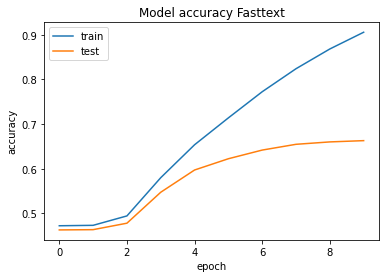

In [ ]:
# summarize history for accuracy
plt.plot(accu_train_test['Accuracy on training data'])
plt.plot(accu_train_test['Accuracy on validation data'])
plt.title('Model accuracy Fasttext')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Only two types of reveiw (Positive and Negative)

In [ ]:
# Drop a row by condition
uniformed_review = uniformed_review[uniformed_review.three_star != 'Neutral']

In [ ]:
uniformed_review['ratings'] = '__label__' + uniformed_review['three_star'].astype(str)
uniformed_review['text_with_rating'] = uniformed_review['ratings']+" " + uniformed_review['text'].astype(str)
review = uniformed_review['text_with_rating']
review.head()

11936    __label__Negative THe quality of the food is r...
14419    __label__Negative Food is not great. You know ...
4688     __label__Negative Stopped in to ask about memb...
19955    __label__Negative The Bun tit nuong was good, ...
5596     __label__Negative Been here many times but thi...
Name: text_with_rating, dtype: object

In [ ]:
review.shape

(20000,)

In [ ]:
############################################
#### Data partition for cross validation ###
############################################

index1 = random.sample(list(review.index),int(len(review)*0.8))
index2 = random.sample(list(review.index),int(len(review)*0.8))
index3 = random.sample(list(review.index),int(len(review)*0.8))
index4 = random.sample(list(review.index),int(len(review)*0.8))
index5 = random.sample(list(review.index),int(len(review)*0.8))
index6 = random.sample(list(review.index),int(len(review)*0.8))
index7 = random.sample(list(review.index),int(len(review)*0.8))
index8 = random.sample(list(review.index),int(len(review)*0.8))
index9 = random.sample(list(review.index),int(len(review)*0.8))
index10 = random.sample(list(review.index),int(len(review)*0.8))



# Creating 10 training data set (80% data):

train1 = review.loc[index1]
train2 = review.loc[index2]
train3 = review.loc[index3]
train4 = review.loc[index4]
train5 = review.loc[index5]
train6 = review.loc[index6]
train7 = review.loc[index7]
train8 = review.loc[index8]
train9 = review.loc[index9]
train10 = review.loc[index10]


# Create 10 validation set (10% data)

valid1 = review.drop(index1)
valid2 = review.drop(index2)
valid3 = review.drop(index3)
valid4 = review.drop(index4)
valid5 = review.drop(index5)
valid6 = review.drop(index6)
valid7 = review.drop(index7)
valid8 = review.drop(index8)
valid9 = review.drop(index9)
valid10 = review.drop(index10)


index11 = random.sample(list(valid1.index),int(len(valid1)*0.5))
index12 = random.sample(list(valid2.index),int(len(valid2)*0.5))
index13 = random.sample(list(valid3.index),int(len(valid3)*0.5))
index14 = random.sample(list(valid4.index),int(len(valid4)*0.5))
index15 = random.sample(list(valid5.index),int(len(valid5)*0.5))
index16 = random.sample(list(valid6.index),int(len(valid6)*0.5))
index17 = random.sample(list(valid7.index),int(len(valid7)*0.5))
index18 = random.sample(list(valid8.index),int(len(valid8)*0.5))
index19 = random.sample(list(valid9.index),int(len(valid9)*0.5))
index20 = random.sample(list(valid10.index),int(len(valid10)*0.5))


test1 = valid1.loc[index11]
test2 = valid2.loc[index12]
test3 = valid3.loc[index13]
test4 = valid4.loc[index14]
test5 = valid5.loc[index15]
test6 = valid6.loc[index16]
test7 = valid7.loc[index17]
test8 = valid8.loc[index18]
test9 = valid9.loc[index19]
test10 = valid10.loc[index20]

valid1 = valid1.drop(index11)
valid2 = valid2.drop(index12)
valid3 = valid3.drop(index13)
valid4 = valid4.drop(index14)
valid5 = valid5.drop(index15)
valid6 = valid6.drop(index16)
valid7 = valid7.drop(index17)
valid8 = valid8.drop(index18)
valid9 = valid9.drop(index19)
valid10 = valid10.drop(index20)

In [ ]:
# Saving the splitted data to run the models:

train1.to_csv(r'train1.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test1.to_csv(r'test1.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid1.to_csv(r'valid1.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train2.to_csv(r'train2.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test2.to_csv(r'test2.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid2.to_csv(r'valid2.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train3.to_csv(r'train3.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test3.to_csv(r'test3.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid3.to_csv(r'valid3.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train4.to_csv(r'train4.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test4.to_csv(r'test4.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid4.to_csv(r'valid4.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train5.to_csv(r'train5.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test5.to_csv(r'test5.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid5.to_csv(r'valid5.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train6.to_csv(r'train6.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test6.to_csv(r'test6.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid6.to_csv(r'valid6.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train7.to_csv(r'train7.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test7.to_csv(r'test7.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid7.to_csv(r'valid7.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train8.to_csv(r'train8.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test8.to_csv(r'test8.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid8.to_csv(r'valid8.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train9.to_csv(r'train9.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test9.to_csv(r'test9.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid9.to_csv(r'valid9.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

train10.to_csv(r'train10.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test10.to_csv(r'test10.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
valid10.to_csv(r'valid10.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

In [ ]:
import time
start = time.time()

In [ ]:
r1 = train_valid_fasttext(train_data = "train1.txt",valid_data = "valid1.txt",data_split="Data Split 1")


In [ ]:
r2 = train_valid_fasttext(train_data = "train2.txt",valid_data = "valid2.txt",data_split="Data Split 2")


In [ ]:
r3 = train_valid_fasttext(train_data = "train3.txt",valid_data = "valid3.txt",data_split="Data Split 3")


In [ ]:
r4 = train_valid_fasttext(train_data = "train4.txt",valid_data = "valid4.txt",data_split="Data Split 4")


In [ ]:
r5 = train_valid_fasttext(train_data = "train5.txt",valid_data = "valid5.txt",data_split="Data Split 5")


In [ ]:
r6 = train_valid_fasttext(train_data = "train6.txt",valid_data = "valid6.txt",data_split="Data Split 6")


In [ ]:
r7 = train_valid_fasttext(train_data = "train7.txt",valid_data = "valid7.txt",data_split="Data Split 7")


In [ ]:
r8 = train_valid_fasttext(train_data = "train8.txt",valid_data = "valid8.txt",data_split="Data Split 8")


In [ ]:
r9 = train_valid_fasttext(train_data = "train9.txt",valid_data = "valid9.txt",data_split="Data Split 9")


In [ ]:
r10 = train_valid_fasttext(train_data = "train10.txt",valid_data = "valid10.txt",data_split="Data Split 10")


In [ ]:
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


Execution time: 00:09:49.18


In [ ]:
combined_results = r1.append([r2,r3,r4,r5,r6,r7,r8,r9,r10],ignore_index=True)
accuracy_training = combined_results.groupby('Epochs', as_index=False)['Accuracy on training data'].mean()
accuracy_test = combined_results.groupby('Epochs', as_index=False)['Accuracy on validation data'].mean()
accu_train_test = pd.concat([accuracy_training,accuracy_test],axis=1)
accu_train_test

,Epochs,Accuracy on training data,Epochs,Accuracy on validation data
0,1,0.648094,1,0.64135
1,2,0.669150,2,0.65960
2,3,0.715175,3,0.69925
3,4,0.782937,4,0.75350
4,5,0.852294,5,0.79945
5,6,0.894812,6,0.82100
6,7,0.926900,7,0.83240
7,8,0.950338,8,0.83985
8,9,0.965850,9,0.84440
9,10,0.977956,10,0.84785


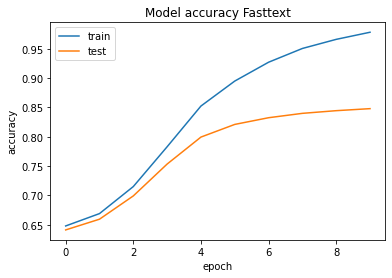

In [ ]:
# summarize history for accuracy
plt.plot(accu_train_test['Accuracy on training data'])
plt.plot(accu_train_test['Accuracy on validation data'])
plt.title('Model accuracy Fasttext')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()